# ***Brain Tumor MRI Image Classification Project***

## *Project Summary*

The goal of the deep learning-based Brain Tumor MRI Image Classification

*   This project is to create a dependable and effective system that can automatically identify brain tumors from MRI images. The use of artificial intelligence (AI) in medical imaging has grown in importance due to the increase in brain tumor cases and the requirement for prompt diagnosis. Building models that can recognize various brain tumor types from MRI scans using Convolutional Neural Networks (CNNs) and Transfer Learning improves diagnostic precision and lessens the need for manual evaluations.

*   The process starts with a thorough examination of the dataset, which consists of MRI pictures categorized into various tumor types. Analyzing the distribution of classes, ensuring image consistency, and using the proper preprocessing methods are the first steps. Images are divided into training, validation, and test sets after being resized to a consistent size (e.g., 224x224 pixels) and normalized to a 0–1 pixel range. To increase the dataset and enhance the model's capacity for generalization, data augmentation methods like rotation, flipping, zooming, brightness shift, and translation are used.

*   Two main strategies are used in the core modeling process: creating a unique CNN from the ground up and using transfer learning to make use of pretrained architectures. Convolutional, pooling, dropout, and dense layers are stacked with regularization methods like batch normalization to create the custom CNN. In parallel, well-known models pretrained on the ImageNet dataset, such as EfficientNetB0, MobileNetV2, or ResNet50, are used for transfer learning. Custom classification layers for the distinct tumor categories are used to fine-tune these models, and the top layers can be unfrozen for further learning.

*   Callbacks such as EarlyStopping and ModelCheckpoint are used during model training in order to prevent overfitting and preserve the top-performing models. Model performance is evaluated using metrics like accuracy, precision, recall, F1-score, and confusion matrix. Plots of accuracy and loss trends are another way to visualize training history, providing information about how people learn over time.

*   A Streamlit web application is then used to deploy the model with the best performance. Users can upload brain MRI images using this intuitive interface, and they will receive real-time tumor classification results with confidence scores. The implementation guarantees that AI-assisted diagnostic tools are accessible to even non-technical healthcare professionals.

*   This project has real-world uses in telemedicine, second-opinion systems, and AI-assisted diagnostics, especially in areas with a shortage of qualified radiologists. By giving high-risk patients priority and supporting early diagnosis and treatment planning, it can improve clinical workflows.

*   A public GitHub repository will be used to share all code, trained models, and deployment scripts, which are kept in an organized, modular, and well-documented manner. To ensure that it provides a solid basis for future research or clinical integration, the project places a strong emphasis on clarity, reproducibility, and deployment readiness.

## *Problem Statement*

*   One of the most complicated and potentially fatal diseases, brain tumors frequently need a prompt and precise diagnosis in order to be effectively treated. Using MRI images to manually diagnose brain tumors takes a lot of time, is prone to human error, and calls for a high level of skill. The goal of this project is to develop a deep learning-based system that can accurately and automatically categorize brain MRI images into various tumor types. Training a custom CNN model and transfer learning models, evaluating their performance, and implementing the top model through a Streamlit application are all part of the solution. The objective is to support radiologists and medical professionals by offering an AI-powered diagnostic tool that is quick, precise, and easy to use.List item



---

### 1. Know Your Data



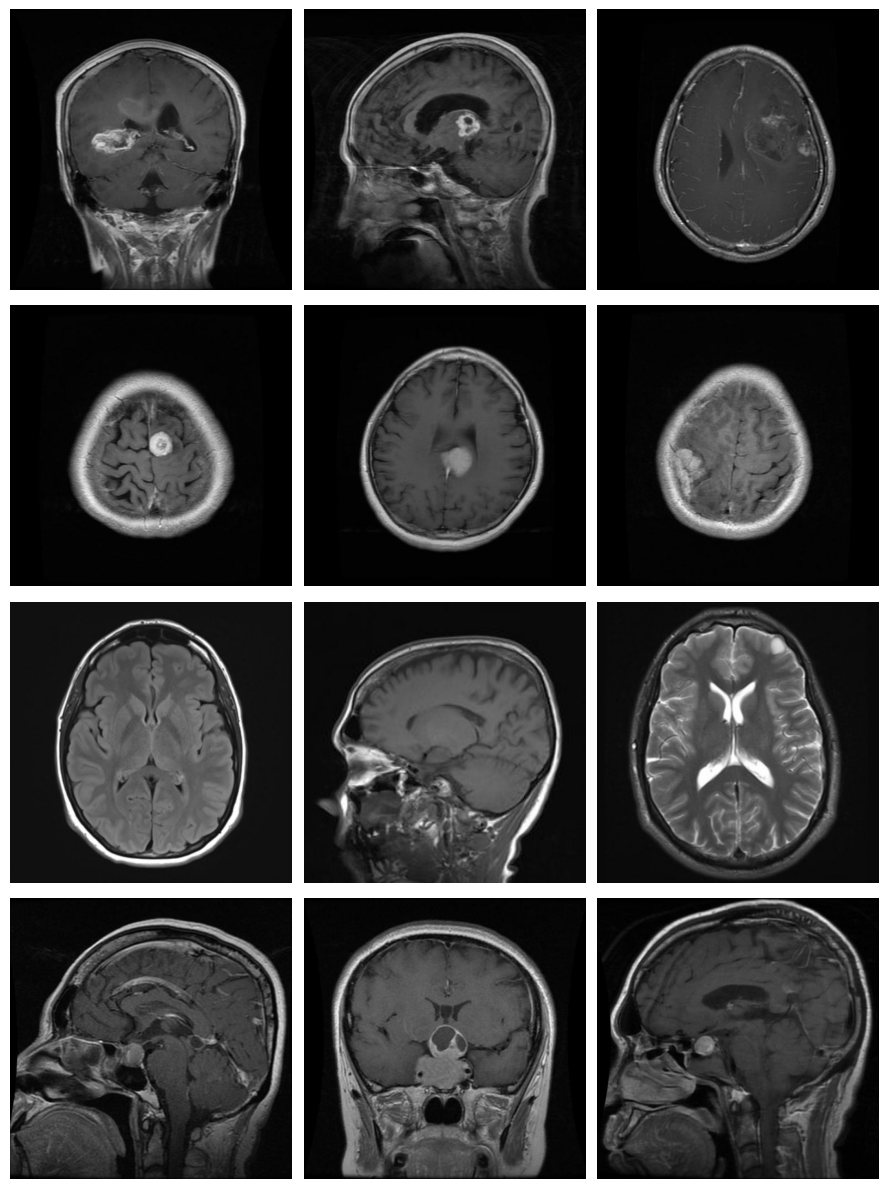

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Correct path to training data
train_dir = "/content/drive/MyDrive/BrainTumorData/Tumour/train"

# Filter class folders (ignore any CSV)
train_classes = [cls for cls in os.listdir(train_dir) if not cls.endswith('.csv')]

# Preview function
def preview_images_from_each_class(base_dir, num_images=3):
    fig, axes = plt.subplots(len(train_classes), num_images, figsize=(num_images*3, len(train_classes)*3))
    for i, cls in enumerate(sorted(train_classes)):
        cls_dir = os.path.join(base_dir, cls)
        images = os.listdir(cls_dir)[:num_images]
        for j, img_name in enumerate(images):
            img_path = os.path.join(cls_dir, img_name)
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_ylabel(cls, fontsize=10)
    plt.tight_layout()
    plt.show()

# Call the function
preview_images_from_each_class(train_dir)


In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set your training directory path
train_dir = "/content/drive/MyDrive/BrainTumorData/Tumour/train"  # Change this path as needed

# Collect image metadata
image_data = []

for cls in sorted([c for c in os.listdir(train_dir) if not c.endswith('.csv')]):
    cls_path = os.path.join(train_dir, cls)
    for fname in os.listdir(cls_path):
        fpath = os.path.join(cls_path, fname)
        try:
            img = Image.open(fpath)
            width, height = img.size
            mode = img.mode
            img_array = np.array(img)
            mean_intensity = np.mean(img_array) if img_array.ndim in [2, 3] else 0
            image_data.append({
                'class': cls,
                'filename': fname,
                'width': width,
                'height': height,
                'mode': mode,
                'mean_intensity': mean_intensity
            })
        except:
            continue

# Convert to DataFrame
df_images = pd.DataFrame(image_data)




```
# As all dataset contains images, so we cant deduce non null variables, statistical derivables etc
```



> But we can derive some insights acccordingly to our metadata




Insight 1 : Class distribution

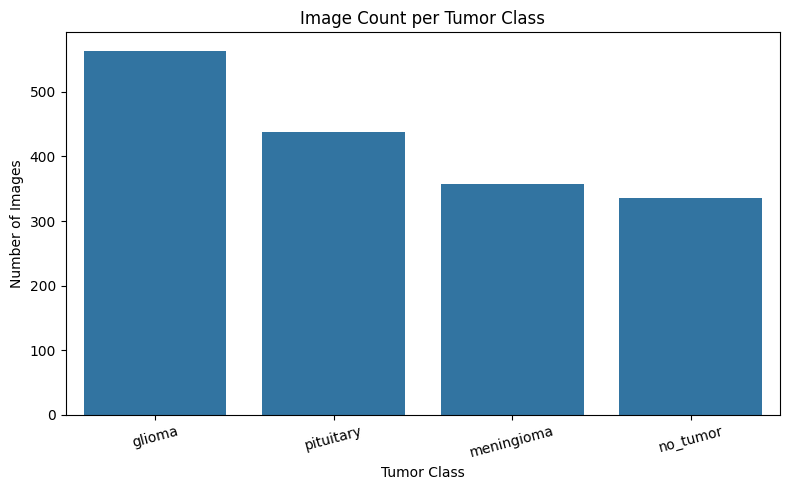

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df_images, order=df_images['class'].value_counts().index)
plt.title("Image Count per Tumor Class")
plt.ylabel("Number of Images")
plt.xlabel("Tumor Class")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Insight 2 : Image size distribution

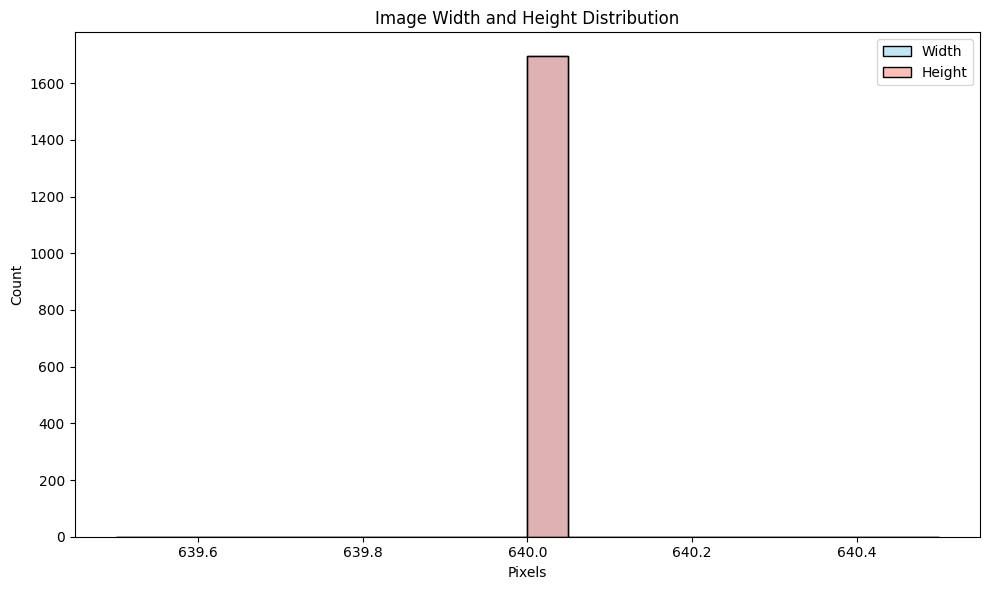

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_images, x='width', bins=20, kde=True, color='skyblue', label='Width')
sns.histplot(data=df_images, x='height', bins=20, kde=True, color='salmon', label='Height')
plt.title("Image Width and Height Distribution")
plt.xlabel("Pixels")
plt.legend()
plt.tight_layout()
plt.show()


Insight 3 : Image mode

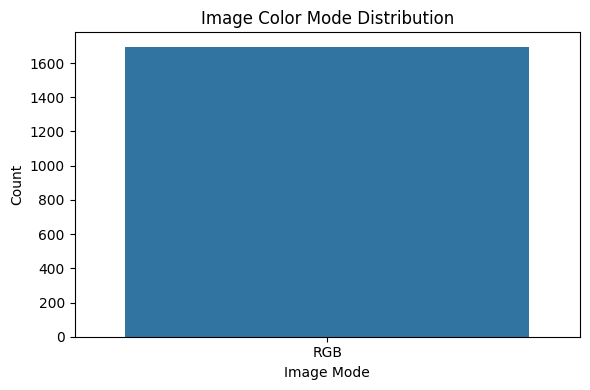

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='mode', data=df_images)
plt.title("Image Color Mode Distribution")
plt.xlabel("Image Mode")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Insight 4. Mean pixel intensity by class

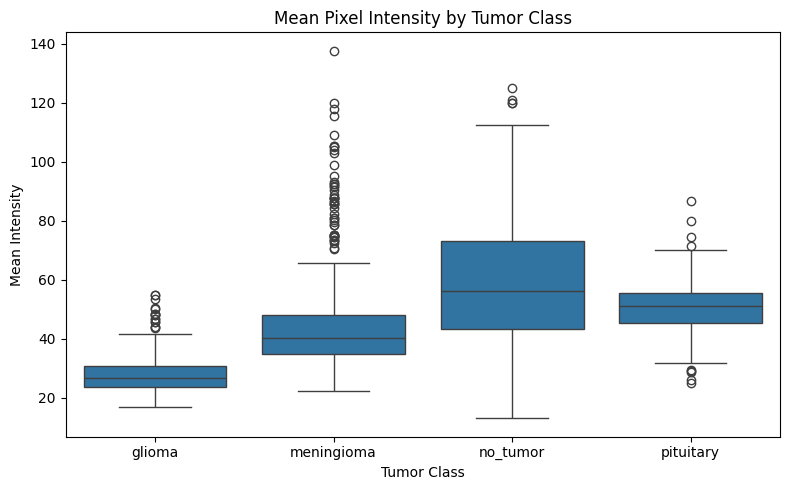

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='mean_intensity', data=df_images)
plt.title("Mean Pixel Intensity by Tumor Class")
plt.xlabel("Tumor Class")
plt.ylabel("Mean Intensity")
plt.tight_layout()
plt.show()

## Hypotheses Testing



> As we have images in our metadata, we cant interpret Hypotheses Testing in it



## Data PreProcessing


Purpose : Artificially expand the training dataset by creating slightly modified versions of the original images.

Benefits: Reduces overfitting and helps the model generalize better.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# ✅ 1. Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,                      # Normalize pixels
    rotation_range=20,                  # Rotate ±20 degrees
    width_shift_range=0.1,              # Shift horizontally
    height_shift_range=0.1,             # Shift vertically
    zoom_range=0.2,                     # Zoom in/out
    brightness_range=[0.8, 1.2],        # Adjust brightness
    horizontal_flip=True,               # Flip horizontally
    vertical_flip=True                  # Flip vertically
)

# ✅ 2. No augmentation for validation/test — only rescaling
# Only rescaling is applied (no augmentation) to ensure the model is evaluated on clean, unaltered data.
val_test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ 3. Creating Generators from Directory
train_dir = "/content/drive/MyDrive/BrainTumorData/Tumour/train"
valid_dir = "/content/drive/MyDrive/BrainTumorData/Tumour/valid"
test_dir  = "/content/drive/MyDrive/BrainTumorData/Tumour/test"

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = val_test_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False   # Keep order for predictions
)


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


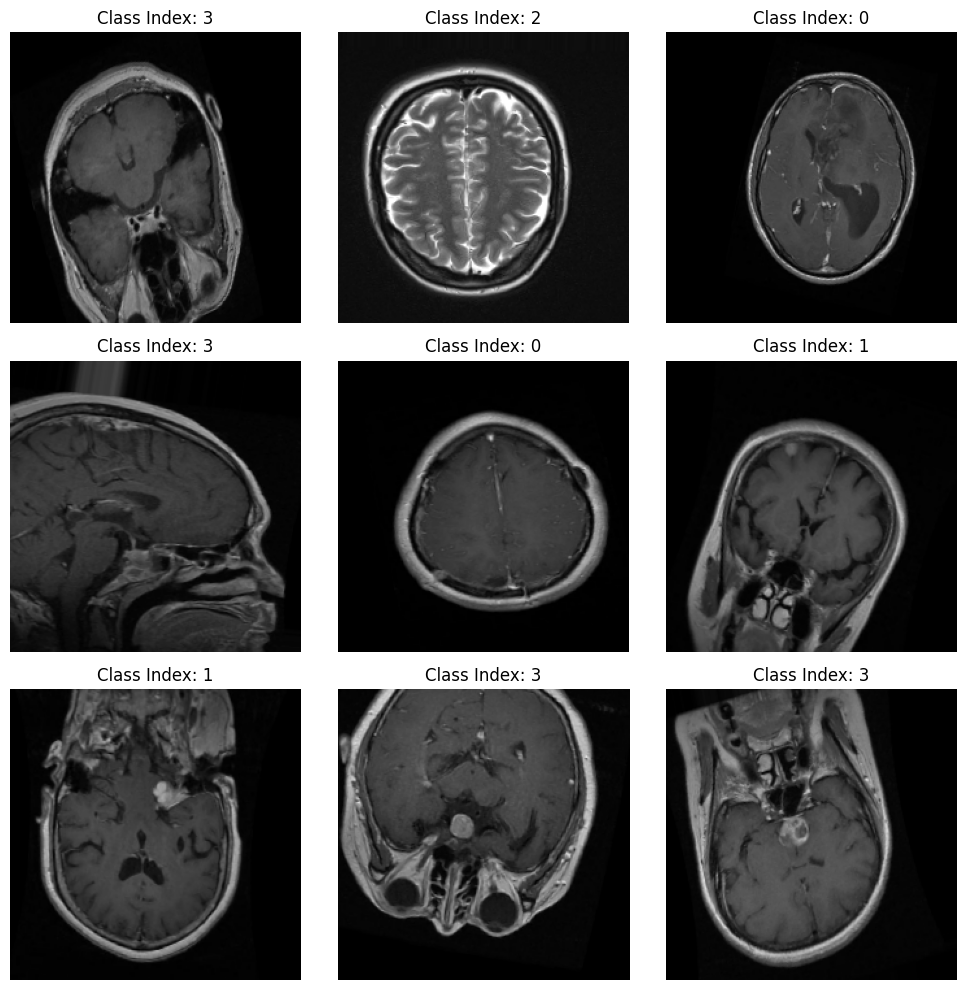

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels
images, labels = next(train_generator)

# Plot first 9 augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"Class Index: {np.argmax(labels[i])}")
plt.tight_layout()


## Modelling


### Custom CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the CNN architecture
custom_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
custom_cnn.compile(optimizer=Adam(learning_rate=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Print summary
custom_cnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,278,980 (84.99 MB)

 Trainable params: 22,278,532 (84.99 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks setup
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'custom_cnn_best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model
history = custom_cnn.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    callbacks=[early_stop, model_checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3929 - loss: 3.1814
Epoch 1: val_loss improved from inf to 4.39619, saving model to custom_cnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 630s 12s/step - accuracy: 0.3936 - loss: 3.1711 - val_accuracy: 0.3207 - val_loss: 4.3962
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4636 - loss: 1.3772
Epoch 2: val_loss did not improve from 4.39619
53/53 ━━━━━━━━━━━━━━━━━━━━ 530s 9s/step - accuracy: 0.4639 - loss: 1.3757 - val_accuracy: 0.3207 - val_loss: 6.7855
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4872 - loss: 1.2288
Epoch 3: val_loss did not improve from 4.39619
53/53 ━━━━━━━━━━━━━━━━━━━━ 473s 9s/step - accuracy: 0.4873 - loss: 1.2289 - val_accuracy: 0.3207 - val_loss: 5.5711
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5331 - loss: 1.1113
Epoch 4: val_loss improved from 4.39619 to 4.11585, saving model to custom_cnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 472s 8s/step - accuracy: 0.5335 - loss: 1.1113 - val_accuracy: 0.3367 - val_loss: 4.1158
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5390 - loss: 1.1203
Epoch 5: val_loss improved from 4.11585 to 1.52052, saving model to custom_cnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 463s 9s/step - accuracy: 0.5393 - loss: 1.1199 - val_accuracy: 0.5478 - val_loss: 1.5205
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5273 - loss: 1.1141
Epoch 6: val_loss improved from 1.52052 to 1.04623, saving model to custom_cnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 463s 9s/step - accuracy: 0.5274 - loss: 1.1148 - val_accuracy: 0.5896 - val_loss: 1.0462
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5183 - loss: 1.1343
Epoch 7: val_loss did not improve from 1.04623
53/53 ━━━━━━━━━━━━━━━━━━━━ 472s 9s/step - accuracy: 0.5186 - loss: 1.1343 - val_accuracy: 0.5120 - val_loss: 1.5833
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4957 - loss: 1.1719
Epoch 8: val_loss did not improve from 1.04623
53/53 ━━━━━━━━━━━━━━━━━━━━ 450s 9s/step - accuracy: 0.4956 - loss: 1.1719 - val_accuracy: 0.4900 - val_loss: 1.4098
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5285 - loss: 1.1092
Epoch 9: val_loss improved from 1.04623 to 0.88599, saving model to custom_cnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 467s 9s/step - accuracy: 0.5287 - loss: 1.1090 - val_accuracy: 0.6514 - val_loss: 0.8860
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6161 - loss: 0.9778
Epoch 10: val_loss improved from 0.88599 to 0.80156, saving model to custom_cnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 501s 9s/step - accuracy: 0.6160 - loss: 0.9784 - val_accuracy: 0.6972 - val_loss: 0.8016
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5717 - loss: 1.0791
Epoch 11: val_loss improved from 0.80156 to 0.77152, saving model to custom_cnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 464s 9s/step - accuracy: 0.5716 - loss: 1.0791 - val_accuracy: 0.7151 - val_loss: 0.7715
Epoch 12/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5767 - loss: 1.0723
Epoch 12: val_loss did not improve from 0.77152
53/53 ━━━━━━━━━━━━━━━━━━━━ 474s 8s/step - accuracy: 0.5766 - loss: 1.0720 - val_accuracy: 0.7112 - val_loss: 0.8092
Epoch 13/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5850 - loss: 1.0257
Epoch 13: val_loss did not improve from 0.77152
53/53 ━━━━━━━━━━━━━━━━━━━━ 411s 8s/step - accuracy: 0.5851 - loss: 1.0258 - val_accuracy: 0.7171 - val_loss: 0.7857
Epoch 14/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6350 - loss: 0.8993
Epoch 14: val_loss did not improve from 0.77152
53/53 ━━━━━━━━━━━━━━━━━━━━ 413s 8s/step - accuracy: 0.6343 - loss: 0.9013 - val_accuracy: 0.7052 - val_loss: 0.8424
Epoch 15/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5832 - loss: 1.0237
Epoch 15: val_loss did not improve from 0.77152
53/53 ━━

53/53 ━━━━━━━━━━━━━━━━━━━━ 422s 8s/step - accuracy: 0.6124 - loss: 0.9850 - val_accuracy: 0.7968 - val_loss: 0.7071
Epoch 17/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6433 - loss: 0.9525
Epoch 17: val_loss improved from 0.70707 to 0.68265, saving model to custom_cnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 432s 8s/step - accuracy: 0.6433 - loss: 0.9524 - val_accuracy: 0.7610 - val_loss: 0.6826
Epoch 18/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6269 - loss: 0.9658
Epoch 18: val_loss did not improve from 0.68265
53/53 ━━━━━━━━━━━━━━━━━━━━ 465s 8s/step - accuracy: 0.6269 - loss: 0.9659 - val_accuracy: 0.6972 - val_loss: 0.8632
Epoch 19/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6701 - loss: 0.8386
Epoch 19: val_loss did not improve from 0.68265
53/53 ━━━━━━━━━━━━━━━━━━━━ 440s 8s/step - accuracy: 0.6699 - loss: 0.8398 - val_accuracy: 0.7311 - val_loss: 0.7678
Epoch 20/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6248 - loss: 0.9382
Epoch 20: val_loss did not improve from 0.68265
53/53 ━━━━━━━━━━━━━━━━━━━━ 440s 8s/step - accuracy: 0.6247 - loss: 0.9384 - val_accuracy: 0.7669 - val_loss: 0.7268
Epoch 21/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6493 - loss: 0.8897
Epoch 21: val_loss improved from 0.68265 to 0.66918, sav

53/53 ━━━━━━━━━━━━━━━━━━━━ 437s 8s/step - accuracy: 0.6493 - loss: 0.8901 - val_accuracy: 0.7869 - val_loss: 0.6692
Epoch 22/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6339 - loss: 0.9676
Epoch 22: val_loss did not improve from 0.66918
53/53 ━━━━━━━━━━━━━━━━━━━━ 431s 8s/step - accuracy: 0.6342 - loss: 0.9670 - val_accuracy: 0.6892 - val_loss: 1.4231
Epoch 23/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6226 - loss: 0.9596
Epoch 23: val_loss improved from 0.66918 to 0.65338, saving model to custom_cnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 482s 9s/step - accuracy: 0.6230 - loss: 0.9590 - val_accuracy: 0.7928 - val_loss: 0.6534
Epoch 24/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6287 - loss: 0.9251
Epoch 24: val_loss did not improve from 0.65338
53/53 ━━━━━━━━━━━━━━━━━━━━ 459s 9s/step - accuracy: 0.6288 - loss: 0.9249 - val_accuracy: 0.7629 - val_loss: 0.6817
Epoch 25/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6440 - loss: 0.8637
Epoch 25: val_loss improved from 0.65338 to 0.59979, saving model to custom_cnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 460s 9s/step - accuracy: 0.6443 - loss: 0.8636 - val_accuracy: 0.8127 - val_loss: 0.5998
Epoch 26/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6551 - loss: 0.9000
Epoch 26: val_loss did not improve from 0.59979
53/53 ━━━━━━━━━━━━━━━━━━━━ 457s 9s/step - accuracy: 0.6550 - loss: 0.9003 - val_accuracy: 0.7012 - val_loss: 0.7792
Epoch 27/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7000 - loss: 0.7868
Epoch 27: val_loss did not improve from 0.59979
53/53 ━━━━━━━━━━━━━━━━━━━━ 476s 9s/step - accuracy: 0.7000 - loss: 0.7876 - val_accuracy: 0.7191 - val_loss: 1.0099
Epoch 28/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6928 - loss: 0.7904
Epoch 28: val_loss did not improve from 0.59979
53/53 ━━━━━━━━━━━━━━━━━━━━ 451s 9s/step - accuracy: 0.6927 - loss: 0.7905 - val_accuracy: 0.7869 - val_loss: 0.7287
Epoch 29/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7156 - loss: 0.8304
Epoch 29: val_loss did not improve from 0.59979
53/53 ━━

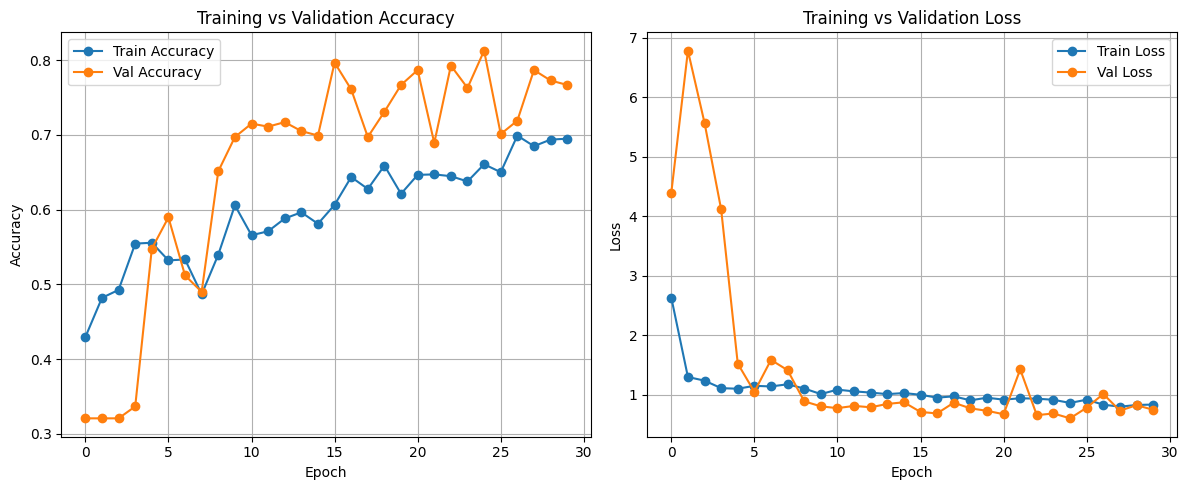

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 73s 10s/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.91      0.93      0.92        80
  meningioma       0.74      0.54      0.62        63
    no_tumor       0.81      0.86      0.83        49
   pituitary       0.76      0.94      0.84        54

    accuracy                           0.82       246
   macro avg       0.81      0.82      0.80       246
weighted avg       0.81      0.82      0.81       246



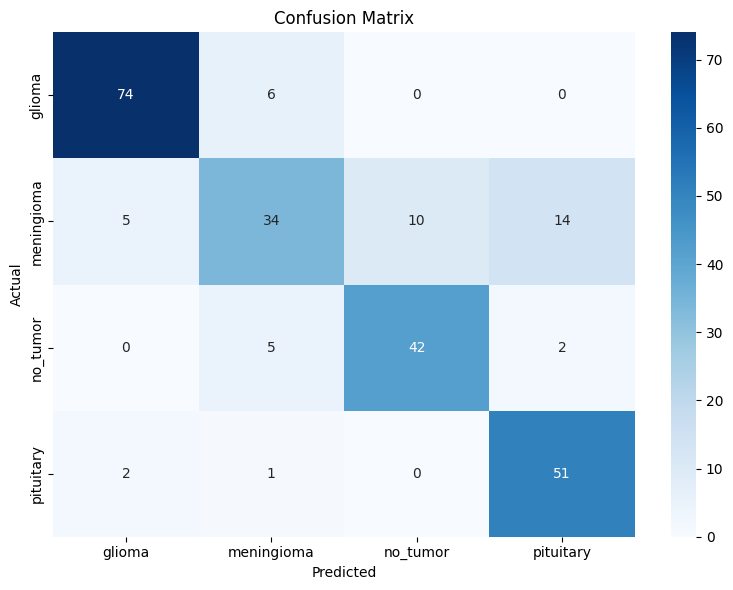

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict test set
y_pred_probs = custom_cnn.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: True labels
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Step 3: Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Step 4: Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
...
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')


### Transfer Learning using MobileNetV2


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_tl = Model(inputs=base_model.input, outputs=predictions)


NameError: name 'num_classes' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/BrainTumorData/Tumour/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/BrainTumorData/Tumour/valid',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/BrainTumorData/Tumour/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Set class names and number of classes
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


In [ ]:
train_dir = os.path.join(extract_path, 'train')
valid_dir = os.path.join(extract_path, 'valid')
test_dir  = os.path.join(extract_path, 'test')


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Define the MobileNetV2 base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_tl = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model_tl.compile(optimizer=Adam(learning_rate=1e-4),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('mobilenetv2_best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train initial model
history_tl = model_tl.fit(train_generator,
                          validation_data=val_generator,
                          epochs=10,
                          callbacks=[early_stop, checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2456 - loss: 2.3350

53/53 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.2464 - loss: 2.3258 - val_accuracy: 0.5618 - val_loss: 1.0984
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5083 - loss: 1.1821

53/53 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.5091 - loss: 1.1806 - val_accuracy: 0.6892 - val_loss: 0.8016
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6326 - loss: 0.9281

53/53 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.6331 - loss: 0.9270 - val_accuracy: 0.7649 - val_loss: 0.6556
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7054 - loss: 0.7640

53/53 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.7057 - loss: 0.7634 - val_accuracy: 0.7749 - val_loss: 0.5869
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7481 - loss: 0.6492

53/53 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.7482 - loss: 0.6492 - val_accuracy: 0.7948 - val_loss: 0.5445
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.7830 - loss: 0.5993 - val_accuracy: 0.7769 - val_loss: 0.5556
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8171 - loss: 0.4941

53/53 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.8168 - loss: 0.4950 - val_accuracy: 0.8227 - val_loss: 0.4825
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.7853 - loss: 0.5450 - val_accuracy: 0.8127 - val_loss: 0.4978
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.8268 - loss: 0.4959 - val_accuracy: 0.8147 - val_loss: 0.4863
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.8103 - loss: 0.4665 - val_accuracy: 0.8207 - val_loss: 0.4781


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step
              precision    recall  f1-score   support

      glioma       0.86      0.88      0.87        80
  meningioma       0.76      0.49      0.60        63
    no_tumor       0.88      0.71      0.79        49
   pituitary       0.64      1.00      0.78        54

    accuracy                           0.77       246
   macro avg       0.78      0.77      0.76       246
weighted avg       0.79      0.77      0.76       246



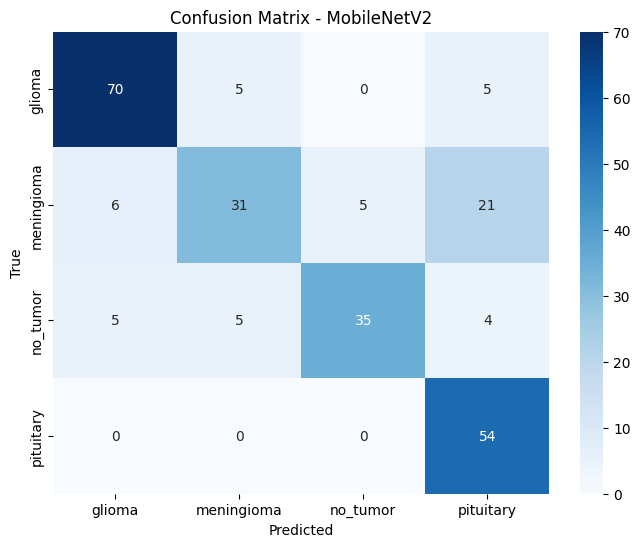

NameError: name 'fine_tune_history' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Evaluate on test set
y_pred_tl = model_tl.predict(test_generator)
y_pred_labels_tl = np.argmax(y_pred_tl, axis=1)
y_true_labels = test_generator.classes

# Classification Report
print(classification_report(y_true_labels, y_pred_labels_tl, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels_tl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - MobileNetV2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Accuracy Plot
plt.figure(figsize=(10, 5))
acc = history_tl.history['accuracy'] + fine_tune_history.history['accuracy']
val_acc = history_tl.history['val_accuracy'] + fine_tune_history.history['val_accuracy']
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy - Transfer Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

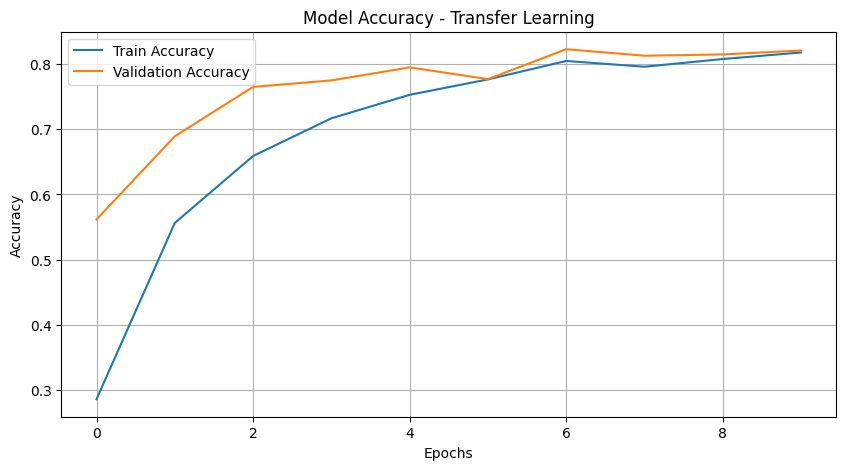

In [ ]:
# Combine history safely if fine-tuning was run
acc = history_tl.history['accuracy']
val_acc = history_tl.history['val_accuracy']

if 'fine_tune_history' in locals():
    acc += fine_tune_history.history['accuracy']
    val_acc += fine_tune_history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy - Transfer Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_pred_cnn = model_cnn.predict(test_generator)  # Your CNN model
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)


NameError: name 'model_cnn' is not defined

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


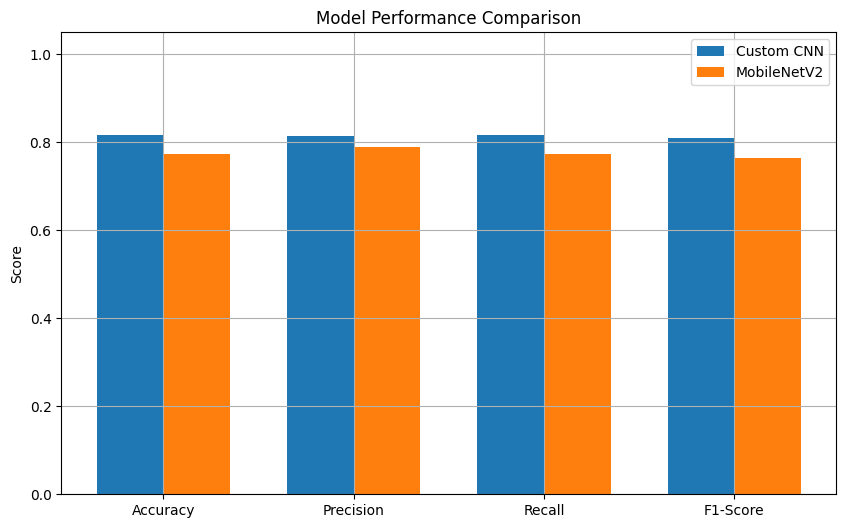

✅ Custom CNN performs comparably or better than MobileNetV2 — possibly due to dataset size or specific training advantages.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Get ground truth
y_true_labels = test_generator.classes

# CNN Predictions
y_pred_probs_cnn = custom_cnn.predict(test_generator)
y_pred_labels_cnn = np.argmax(y_pred_probs_cnn, axis=1)

# Transfer Learning Predictions (already defined earlier)
y_pred_labels_tl = np.argmax(model_tl.predict(test_generator), axis=1)

# Calculate metrics for both
cnn_accuracy = accuracy_score(y_true_labels, y_pred_labels_cnn)
cnn_precision = precision_score(y_true_labels, y_pred_labels_cnn, average='weighted')
cnn_recall = recall_score(y_true_labels, y_pred_labels_cnn, average='weighted')
cnn_f1 = f1_score(y_true_labels, y_pred_labels_cnn, average='weighted')

tl_accuracy = accuracy_score(y_true_labels, y_pred_labels_tl)
tl_precision = precision_score(y_true_labels, y_pred_labels_tl, average='weighted')
tl_recall = recall_score(y_true_labels, y_pred_labels_tl, average='weighted')
tl_f1 = f1_score(y_true_labels, y_pred_labels_tl, average='weighted')

# Plot comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
cnn_scores = [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1]
tl_scores = [tl_accuracy, tl_precision, tl_recall, tl_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, cnn_scores, width, label='Custom CNN')
plt.bar(x + width/2, tl_scores, width, label='MobileNetV2')
plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Print best model summary
if tl_accuracy > cnn_accuracy:
    print("✅ MobileNetV2 performs better overall than the Custom CNN model.")
else:
    print("✅ Custom CNN performs comparably or better than MobileNetV2 — possibly due to dataset size or specific training advantages.")
